In [4]:
import numpy as np
import pandas as pd
df10=pd.read_csv('df10_3.csv')
df10.head(10)

,id,js,fz,temp_max,bc,bc_2,temp,ms,temp_change
0,183,182,11.351351,500959269,-380,0,223437084.1,0,0.000000e+00
1,184,183,11.520548,500959270,-380,0,212773854.0,1,1.996170e-09
2,185,184,11.597222,500959268,-380,0,222684990.9,2,-3.992340e-09
3,186,185,9.753425,500959267,-380,0,199050736.8,3,-1.996170e-09
4,187,186,11.108108,500959267,-380,0,236974750.6,4,0.000000e+00
5,188,187,11.369863,500959268,-380,0,219635409.8,5,1.996170e-09
6,189,188,11.315068,500959269,-380,0,226496967.5,6,1.996170e-09
7,190,189,11.416667,500959267,-380,0,222684990.3,7,-3.992340e-09
8,191,190,11.347222,500959268,-380,0,243555561.6,8,1.996170e-09
9,192,191,10.930556,500959266,-380,0,222684990.4,9,-3.992340e-09


In [5]:
df10.drop(['id','js','bc','temp','temp_change'], axis=1, inplace=True)

In [3]:
df10.head(10)

,id,fz,temp_max,bc_2,ms,temp_change
0,183,11.351351,500959269,0,0,0.000000e+00
1,184,11.520548,500959270,0,1,1.996170e-09
2,185,11.597222,500959268,0,2,-3.992340e-09
3,186,9.753425,500959267,0,3,-1.996170e-09
4,187,11.108108,500959267,0,4,0.000000e+00
5,188,11.369863,500959268,0,5,1.996170e-09
6,189,11.315068,500959269,0,6,1.996170e-09
7,190,11.416667,500959267,0,7,-3.992340e-09
8,191,11.347222,500959268,0,8,1.996170e-09
9,192,10.930556,500959266,0,9,-3.992340e-09


In [64]:
from sklearn.model_selection import train_test_split
np.random.seed(21)
target = df10['fz']
df10.drop('fz', axis=1, inplace=True)
train_data, val_data, train_y, val_y = train_test_split(
    df10, target, train_size=0.8, random_state=21
)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def simple_linear_model(train_data, train_y, val_data, val_y, input_feature):
    reg = LinearRegression()
    reg.fit(train_data.as_matrix(columns=[input_feature]), train_y)
    RMSE = mean_squared_error(
        val_y, reg.predict(val_data.as_matrix(columns=[input_feature]))
    ) ** 0.5
    return RMSE

In [66]:
np.random.seed(21)
RMSE = simple_linear_model(train_data, train_y, val_data, val_y, 'temp_max')
print('Validation RMSE for temp_max is: %s' % RMSE)

Validation RMSE for temp_max is: 0.7653114214845761


D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [67]:
estimate_result = pd.DataFrame(columns=['feature', 'Val_RMSE'])

np.random.seed(21)

for feature in train_data.columns:
    RMSE = simple_linear_model(train_data, train_y, val_data, val_y, feature)
    estimate_result = estimate_result.append({'feature': feature, 'Val_RMSE': RMSE}, ignore_index=True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in

In [68]:
estimate_result.sort_values(by='Val_RMSE').head(3)

,feature,Val_RMSE
0,id,0.714344
2,bc_2,0.764992
1,temp_max,0.765311


In [69]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(21)

def regression_model(reg, train_data, train_y, val_data, val_y, input_feature):
    reg.fit(train_data.as_matrix(columns=input_feature), train_y)
    RMSE = mean_squared_error(
        val_y, reg.predict(val_data.as_matrix(columns=input_feature))
    ) ** 0.5
    return reg, RMSE

ridge = Ridge()
dt_gre = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
ridge, RMSE = regression_model(ridge, train_data, train_y, val_data, val_y, train_data.columns)
print('RMSE for ridge_regression is %s' % RMSE)
dt_gre, RMSE = regression_model(dt_gre, train_data, train_y, val_data, val_y, train_data.columns)
print('RMSE for DecisionTreeRegressor is %s' % RMSE)
rf_reg, RMSE = regression_model(rf_reg, train_data, train_y, val_data, val_y, train_data.columns)
print('RMSE for RandomForestRegressor is %s' % RMSE)

RMSE for ridge_regression is 0.7073740274300278
RMSE for DecisionTreeRegressor is 0.6820443852242485
RMSE for RandomForestRegressor is 0.5238296826356965


D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 1

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: Qt5Agg


In [71]:
df10.head()

,id,temp_max,bc_2,ms
0,183,500959269,0,0
1,184,500959270,0,1
2,185,500959268,0,2
3,186,500959267,0,3
4,187,500959267,0,4


In [29]:
df10_2=pd.read_csv('df10_3.csv')

In [30]:
df10_2.head()

,id,js,fz,temp_max,bc,bc_2,temp,ms
0,183,182,11.351351,500959269,-380,0,223437084.1,0
1,184,183,11.520548,500959270,-380,0,212773854.0,1
2,185,184,11.597222,500959268,-380,0,222684990.9,2
3,186,185,9.753425,500959267,-380,0,199050736.8,3
4,187,186,11.108108,500959267,-380,0,236974750.6,4


D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


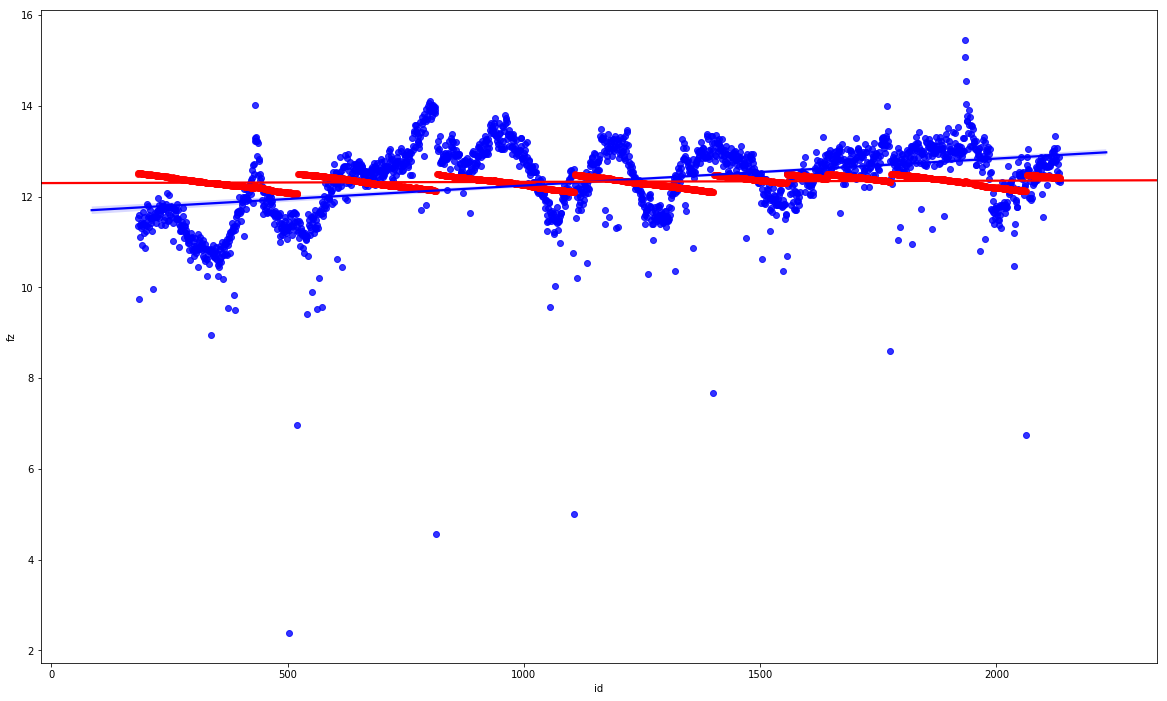

In [60]:
#岭回归
plt.figure(figsize=(20,12))
sns.regplot(x='id',y='fz',data=df10_2,color='blue')
sns.regplot(x='id',y=ridge.predict(df10),data=df10_2,color='red')

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


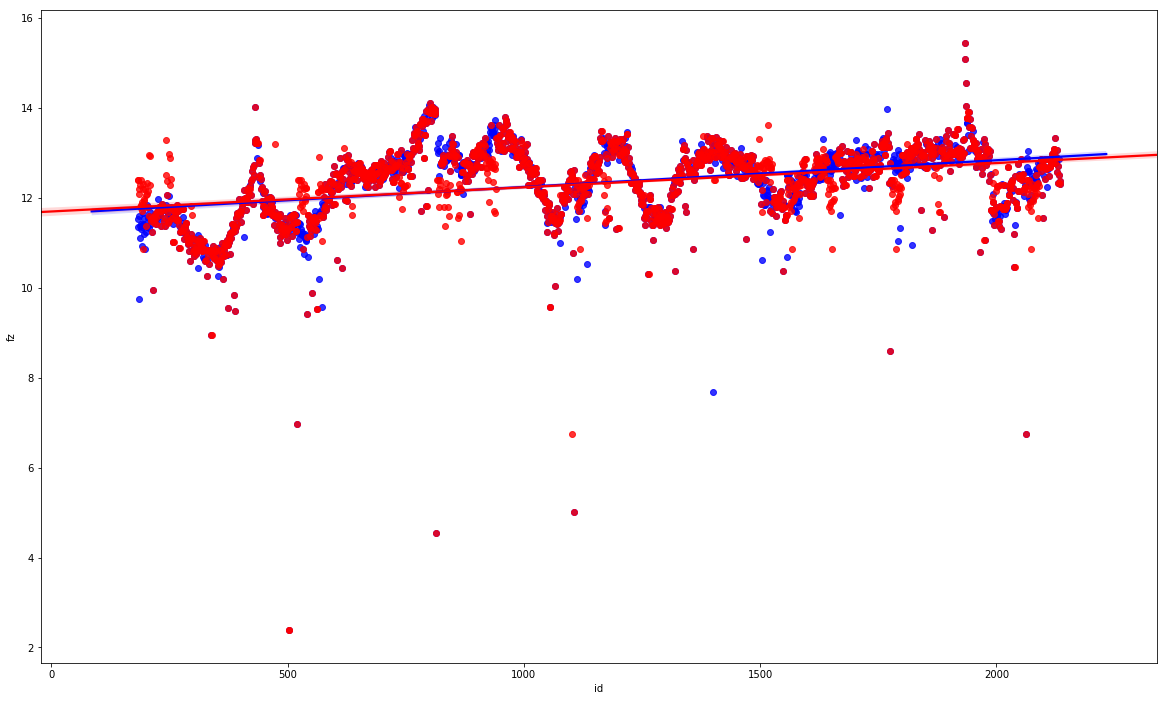

In [58]:
#决策树
plt.figure(figsize=(20,12))
sns.regplot(x='id',y='fz',data=df10_2,color='blue')
sns.regplot(x='id',y=dt_gre.predict(df10),data=df10_2,color='red')

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


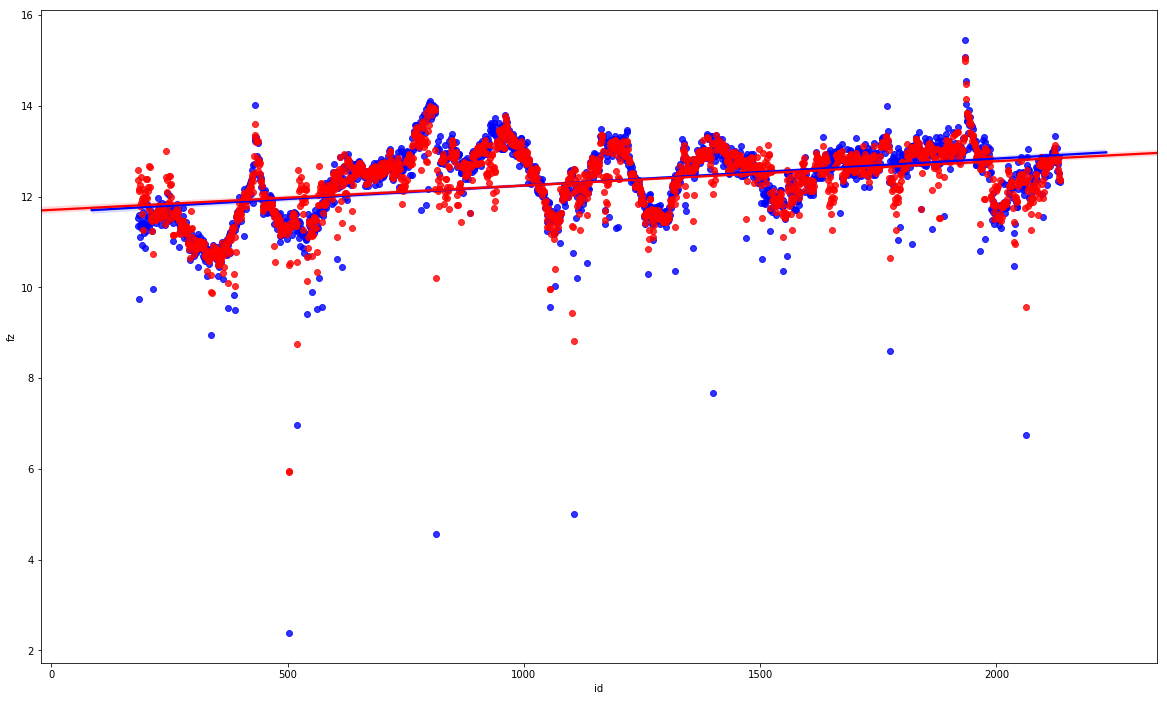

In [59]:
#随机森林
plt.figure(figsize=(20,12))
sns.regplot(x='id',y='fz',data=df10_2,color='blue')
sns.regplot(x='id',y=rf_reg.predict(df10),data=df10_2,color='red')